In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [2]:
train_dir = './Dataset/train/'
test_dir = './Dataset/val/'
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True, 
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)


In [3]:
image_size = (150, 150)
batch_size = 32

# Load and transform images from the training directory
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    shuffle=True
)

# Load images from the validation directory
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False
)


Found 8863 images belonging to 2 classes.
Found 600 images belonging to 2 classes.


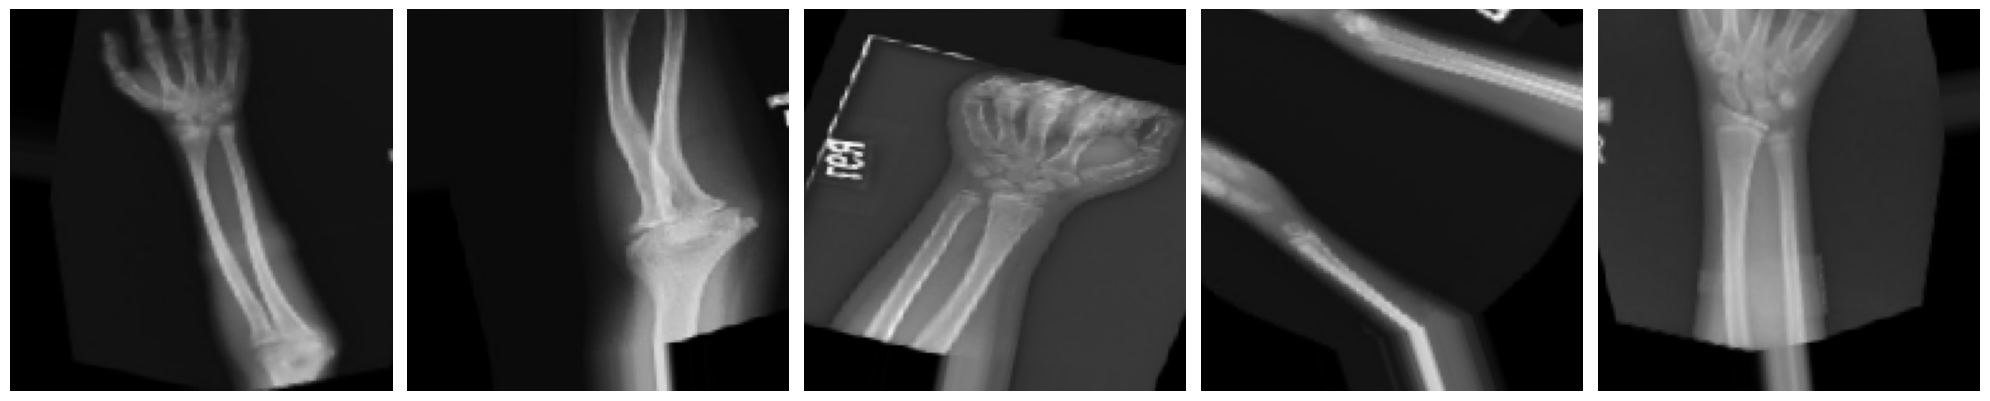

In [4]:
import matplotlib.pyplot as plt

def plot_images(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

images, labels = next(train_generator)
plot_images(images[:5]) 


In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Input(shape=(150, 150, 3)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [6]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='accuracy',
    patience=3,
    restore_best_weights=True
)


In [8]:
history = model.fit(
    train_generator,
    epochs=10,
    callbacks=[early_stopping]
)

Epoch 1/10
277/277 [==============================] - 174s 629ms/step - loss: 0.6794 - accuracy: 0.5601
Epoch 2/10
277/277 [==============================] - 115s 414ms/step - loss: 0.6654 - accuracy: 0.5843
Epoch 3/10
277/277 [==============================] - 114s 411ms/step - loss: 0.6530 - accuracy: 0.5992
Epoch 4/10
277/277 [==============================] - 115s 416ms/step - loss: 0.6354 - accuracy: 0.6277
Epoch 5/10
277/277 [==============================] - 116s 417ms/step - loss: 0.6185 - accuracy: 0.6448
Epoch 6/10
277/277 [==============================] - 115s 416ms/step - loss: 0.5942 - accuracy: 0.6709
Epoch 7/10
277/277 [==============================] - 116s 417ms/step - loss: 0.5708 - accuracy: 0.6969
Epoch 8/10
277/277 [==============================] - 114s 413ms/step - loss: 0.5254 - accuracy: 0.7351
Epoch 9/10
277/277 [==============================] - 115s 416ms/step - loss: 0.4830 - accuracy: 0.7683
Epoch 10/10
277/277 [==============================] - 113s 407m

In [9]:
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")


19/19 [==============================] - 6s 329ms/step - loss: 0.7174 - accuracy: 0.6450
Test Loss: 0.7173828482627869, Test Accuracy: 0.6449999809265137


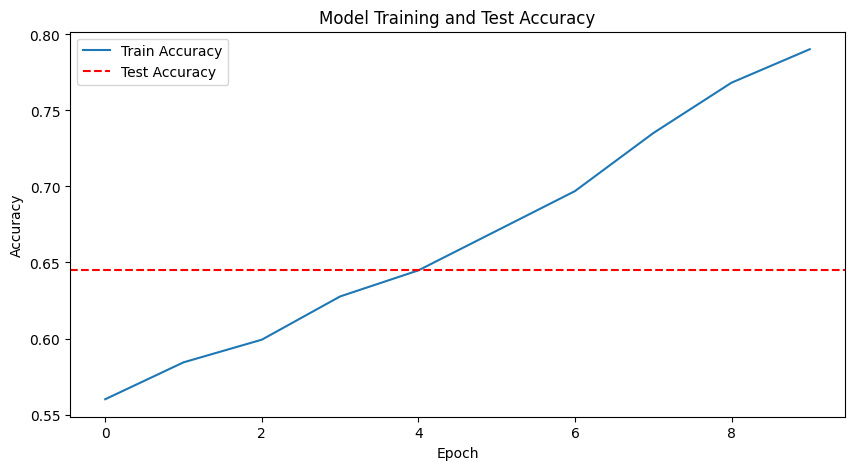

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.axhline(y=test_accuracy, color='r', linestyle='--', label='Test Accuracy')
plt.title('Model Training and Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [11]:
model.save('fracturePrediction.h5')

c:\Users\Madan\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [14]:
from tensorflow.keras.models import load_model
model1 = load_model('fracturePrediction.h5')


In [36]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

model1 = load_model('fracturePrediction.h5')

def preprocess_image(img_path, target_size):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) 
    img_array /= 255.0 
    return img_array

img_path = 'C:/Users/Madan/OneDrive/Desktop/intel/Project_oneAPI_hack_kpr/backend/models/Dataset/train/fractured/12-rotated2-rotated2-rotated1.jpg'
# img_path = 'C:/Users/Madan/OneDrive/Desktop/intel/Project_oneAPI_hack_kpr/backend/models/Dataset/train/not fractured/70-rotated3-rotated3-rotated3-rotated1.jpg'
input_data = preprocess_image(img_path, target_size=(150, 150))

predictions = model1.predict(input_data)
print(predictions)
if predictions[0] > 0.5:
    print("Prediction: Not Fractured")
else:
    print("Prediction: Fractured")


1/1 [==============================] - 0s 72ms/step
[[0.01467494]]
Prediction: Fractured
